I'm choosing to gather the best neighborhood for dogs based on the amount of parks in the neighborhood. I'm going to do so by determining the acreage of parks per neighborhood. There's a unique issue to tackle with my data set, in which the data set I have only displays the name of the park, not the name of the neighborhood. As a solution, I found a second data set that ties together park and neighborhood names. This way, I can gather all data using the park data set, then link each respective park to its neighborhood through a second data set.

First thing we need to do is import are needed libraries:
* Pandas - For reading the dataset
* PyPlot - For plotting data

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

Next I'm going to define an empty dictionary to link the acreage to each park.

In [3]:
parkDict = {}

Next we need to read the park data and add each park with its respective acreage to the dictionary. The tricky part is that each park has up to three different names due to name changes over time. To solve this, I'm going to add all three park names to the dictionary with the same acreage. That way, regardless of which park name the second data set uses to link to a neighborhood, I'll have it covered. We'll do this by iterating over every row in the park data, reading the park name and acreage, then adding it to the dictionary.

In [4]:
parkData = pd.read_csv("park-data.csv")
for index, row in parkData.iterrows():
    acreage = row['acreage']
    parkDict[row['origpkname']] = acreage
    parkDict[row['updatepknm']] = acreage
    parkDict[row['alterntnam']] = acreage

Now that we have the acreage for all the parks, we need to read the second data set to link each park to its proper neighborhood. We'll start by creating another dictionary to link acreage to each neighborhood.

In [5]:
neighDict = {}

To read the data, let's iterate through all the parks in the second data set. If we find a park in this data set matching one we have stored in the parkData dictionary, we'll add the acreage from that park to neighDict with its respective neighborhood. Note that if we find two parks from the same neighborhood, we ensure to add the park's acreage to the existing acreage for that neighborhood rather than overriding it.

In [6]:
links = pd.read_csv("neighborhood-links.csv")
for index, row in links.iterrows():
    if row['name'] in parkDict:
        if row['neighborhood'] in neighDict:
            neighDict[row['neighborhood']] += parkDict[row['name']]
        else:
            neighDict[row['neighborhood']] = parkDict[row['name']]

Next, we're going to create a new dataframe from the neighborhood/acreage dictionary, assigning the columns proper names.

In [7]:
df = pd.DataFrame(list(neighDict.items()),columns = ['Neighborhood','Acreage'])

Finally, we'll sort the data based on the highest average, grab the first 20 entries, and plot them on a bar graph.

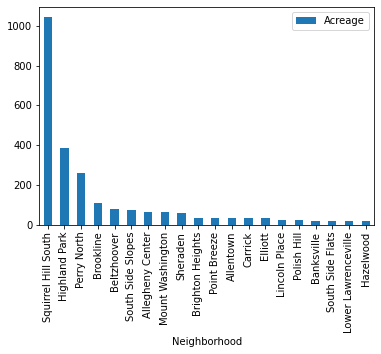

In [103]:
df.sort_values(by=['Acreage'], ascending=False).head(20).plot.bar(x='Neighborhood', y='Acreage')

We now have a bar graph representing the acreage ofd parks in each respective neighborhood. While this shows a clear trend, to emphasize the clear winner in this metric, let's create a geological map. First thing we have to do for this map is to read the shapefile for the Pittsburgh neighborhood.

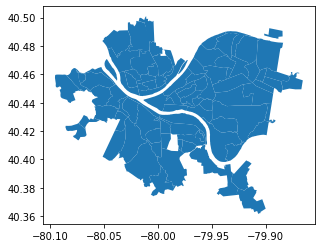

In [106]:
regions = gpd.read_file('shapefiles/Neighborhoods_.shp')
regions.plot()

This gives us a skeleton to use for plotting geological information regarding the acreage. Now that we have our shape to fill, let's create a new dataframe which merges the neighborhood geological data from the shapefiles with our acreage data. We'll also ensure to replace any NaN (Not a Number) entries with a 0 to prevent issues reading the data.

In [107]:
map = regions.merge(df, how='left', left_on='hood', right_on='Neighborhood')
map = map.fillna(0)

Finally, let's create the plot with some parameters to make it look nice.

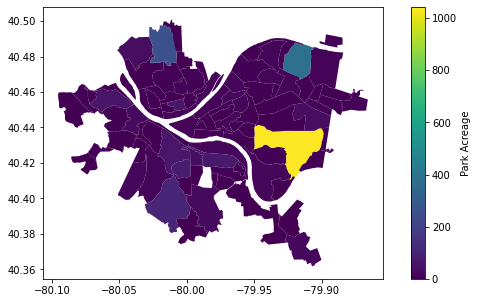

In [112]:
map.plot(column='Acreage', legend=True, legend_kwds={'label': 'Park Acreage'}, figsize=(10, 5))

Now that we've seen both a geological map as well as a bar chart, it's clear that in this metric, Squirrel Hill South easily takes the lead for the most optimal park.